# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.130956e+01     7.018484e+00
 * time: 0.004954099655151367
     1     2.805098e+01     4.066070e+00
 * time: 0.014595985412597656
     2     2.359039e+01     9.019123e+00
 * time: 0.038038015365600586
     3     1.351969e+01     2.211047e+00
 * time: 0.06699991226196289
     4     1.218124e+01     2.314839e+00
 * time: 0.08613991737365723
     5     1.138606e+01     1.402086e+00
 * time: 0.11008810997009277
     6     1.073331e+01     1.938403e+00
 * time: 0.12924790382385254
     7     1.017555e+01     8.965259e-01
 * time: 0.14843511581420898
     8     9.833787e+00     7.359002e-01
 * time: 0.1677849292755127
     9     9.690593e+00     5.659818e-01
 * time: 0.18694591522216797
    10     9.595483e+00     4.067692e-01
 * time: 0.2060549259185791
    11     9.525541e+00     3.725711e-01
 * time: 0.22540593147277832
    12     9.485561e+00     4.574706e-01
 * time: 0.2400369644165039
    13     9.445534e+00     3.794220e-01
 * time:

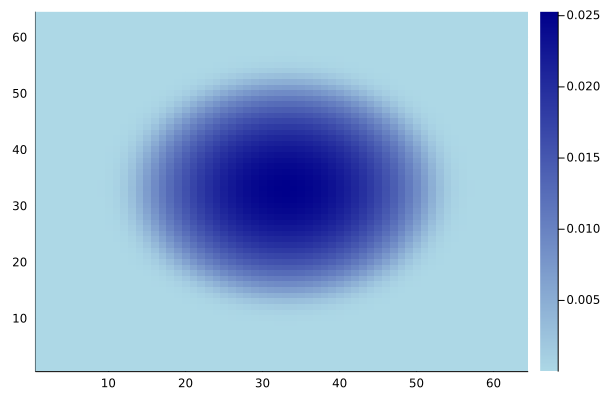

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)